__Pumpkins__

In [1]:
from thinkstats import MeanVar
import matplotlib.pyplot as plt
import myplot
import math
%matplotlib inline

In [2]:
pumpkins = [1, 1, 1, 3, 3, 591]
mu, var = MeanVar(pumpkins)
std = math.sqrt(var)

print "Mean", mu
print "Variance", var
print "Standard Deviation", std

Mean 100.0
Variance 48217.0
Standard Deviation 219.583697027


__Gestation Time__

In [3]:
import survey
table = survey.Pregnancies()
table.ReadRecords()

In [4]:
def is_live_birth(record):
    return record.outcome == 1

live_births = [r for r in table.records if is_live_birth(r)]
first_babies = []
other_babies = []

for rec in live_births:
    if rec.birthord == 1:
        first_babies.append(rec)
    else:
        other_babies.append(rec)        

In [5]:
mu_first, var_first = MeanVar([r.prglength for r in first_babies])
mu_other, var_other = MeanVar([r.prglength for r in other_babies])

std_first = math.sqrt(var_first)
std_other = math.sqrt(var_other)

print "std first", std_first
print "std other", std_other
print "diff", std_first - std_other

std first 2.79158506982
std other 2.61557611068
diff 0.17600895914


In [6]:
print "mean first", mu_first
print "mean other", mu_other
print "diff", mu_first - mu_other

mean first 38.6009517335
mean other 38.5229144667
diff 0.0780372667775


The difference in the means is less than the standard deviation, it might be statistically insignificant

__The Mode__

In [7]:
import Pmf

In [8]:
hist = Pmf.MakeHistFromList([1, 1, 1, 1, 2, 2, 2, 3, 3, 4])

In [9]:
def mode(hist):
    return max(hist.Items(), key=lambda (x, f): f)[0]

In [10]:
mode(hist)

1

In [11]:
def all_modes(hist):
    return sorted(hist.Items(), key=lambda (x, f): f, reverse=True)

In [12]:
all_modes(hist)

[(1, 4), (2, 3), (3, 2), (4, 1)]

__Remaining Lifetime__

In [13]:
pmf = Pmf.MakePmfFromDict({1: 0.3, 2: 0.3, 3: 0.3, 4: 0.1})

In [14]:
def remaining_lifetime(pmf, age):
    return Pmf.MakePmfFromDict({x: p for (x, p) in pmf.Items() if age <= x})

In [15]:
remaining_lifetime(pmf, 2).Items()

[(2, 0.4285714285714285), (3, 0.4285714285714285), (4, 0.14285714285714288)]

__Pmf Stats__

In [16]:
def pmf_mean(pmf):
    return sum([x*p for (x, p) in pmf.Items()])

def pmf_var(pmf, mu=None):
    mu = mu or pmf_mean(pmf)
    return sum([math.pow(x-mu, 2)*p for (x, p) in pmf.Items()])

In [17]:
print "Mean", pmf.Mean()
print "Variance", pmf.Var()

print "My Mean", pmf_mean(pmf)
print "My Variance", pmf_var(pmf)

Mean 2.2
Variance 0.96
My Mean 2.2
My Variance 0.96


__Risk__

In [18]:
def prob_range(pmf, lb=None, ub=None):
    return sum([p for (x, p) in pmf.Items() if (not lb or lb <= x) and (not ub or x < ub)])

def prob_early(pmf):
    return prob_range(pmf, ub=38)

def prob_on_time(pmf):
    return prob_range(pmf, lb=38, ub=41)

def prob_late(pmf):
    return prob_range(pmf, lb=41)

In [19]:
first_pmf = Pmf.MakePmfFromList([r.prglength for r in first_babies])
other_pmf = Pmf.MakePmfFromList([r.prglength for r in other_babies])

In [20]:
print "first babies"
print "early", prob_early(first_pmf)
print "on time", prob_on_time(first_pmf)
print "late", prob_late(first_pmf)
print
print "other babies"
print "early", prob_early(other_pmf)
print "on time", prob_on_time(other_pmf)
print "late", prob_late(other_pmf)

first babies
early 0.182415590301
on time 0.662134602311
late 0.155449807387

other babies
early 0.168321013728
on time 0.737909186906
late 0.0937697993664


__Relative Risk__

In [21]:
def relative_risk(p1, p2):
    return p1/p2

In [22]:
print "relative risk for first babies"
print "early", relative_risk(prob_early(first_pmf), prob_early(other_pmf))
print "on time", relative_risk(prob_on_time(first_pmf), prob_on_time(other_pmf))
print "late", relative_risk(prob_late(first_pmf), prob_late(other_pmf))

relative risk for first babies
early 1.08373628617
on time 0.897311775027
late 1.65778116662


__Conditional Babies__

In [23]:
def born_this_week(pmf, week):

    if not pmf.Prob(week):
        return 0
    
    new_pmf = Pmf.MakePmfFromDict({w: p for (w, p) in pmf.Items() if week <= w})
    return new_pmf.Prob(week)

In [24]:
live_pmf = Pmf.MakePmfFromList([r.prglength for r in live_births])
born_this_week(live_pmf, 39)

0.6763222366335209

In [25]:
weeks = range(20, 52, 1)
first_probs = [born_this_week(first_pmf, w) for w in weeks]
other_probs = [born_this_week(other_pmf, w) for w in weeks]

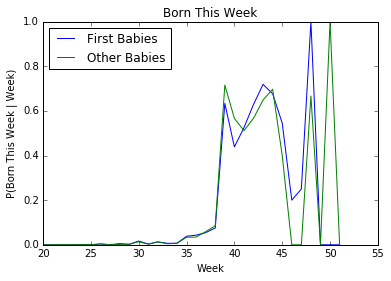

In [26]:
f, ax = plt.subplots()
ax.set_xlabel("Week")
ax.set_ylabel("P(Born This Week | Week)")
ax.set_title("Born This Week")
first_line = ax.plot(weeks, first_probs, label="First Babies")
other_line = ax.plot(weeks, other_probs, label="Other Babies")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc="upper left");

__Conclusion__

It does seem that first babies are born later than other babies, but the difference isn't very significant